In [18]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Library dari Keras untuk preprocessing dan membangun model RNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [19]:
# Load dataset
# Baca dataset spam SMS
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # ambil kolom label dan pesan
df.columns = ['label', 'text']

# Konversi label: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Ambil 100 spam & 100 ham
spam = df[df['label'] == 1].sample(n=100, random_state=42)
ham = df[df['label'] == 0].sample(n=100, random_state=42)

# Gabungkan dan acak data
df_small = pd.concat([spam, ham]).sample(frac=1, random_state=42).reset_index(drop=True)

df_small.head()


,label,text
0,1,Call Germany for only 1 pence per minute! Call...
1,1,You will recieve your tone within the next 24h...
2,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
3,0,Try to do something dear. You read something f...
4,0,Lol for real. She told my dad I have cancer


In [20]:
# Tokenisasi teks: mengubah kata menjadi indeks angka
tokenizer = Tokenizer(num_words=5000)# Gunakan hanya 5000 kata teratas untuk efisiensi
tokenizer.fit_on_texts(df_small['text'])
X = tokenizer.texts_to_sequences(df_small['text'])
# Padding: semua teks diubah ke panjang yang sama (50 token)
X = pad_sequences(X, maxlen=50)
# Label target
y = df_small['label'].values

# Split data untuk training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = Sequential()
# Embedding Layer: ubah indeks kata menjadi vektor representasi kata
model.add(Embedding(input_dim=5000, output_dim=64))
# LSTM Layer: menangkap urutan dan konteks dalam kalimat
model.add(LSTM(64))
# Dense Output Layer: sigmoid karena tugas klasifikasi biner
model.add(Dense(1, activation='sigmoid'))


# Kompilasi model: gunakan binary_crossentropy untuk klasifikasi biner
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 50))  
# Tampilkan arsitektur model
model.summary()

# Training
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,089 (1.35 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.4578 - loss: 0.6874 - val_accuracy: 0.8125 - val_loss: 0.6418
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8524 - loss: 0.6085 - val_accuracy: 0.8125 - val_loss: 0.4824
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8775 - loss: 0.4739 - val_accuracy: 0.7500 - val_loss: 0.4138
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8391 - loss: 0.3701 - val_accuracy: 0.7188 - val_loss: 0.3891
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8840 - loss: 0.2902 - val_accuracy: 0.7812 - val_loss: 0.4114
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9222 - loss: 0.1969 - val_accuracy: 0.8750 - val_loss: 0.2816
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9304 - loss: 0.1463 - val_accuracy: 0.8438 - val_loss: 0.2477
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9845 - loss: 0.0924 - val_accuracy: 0.9062 - val_loss: 0.2322


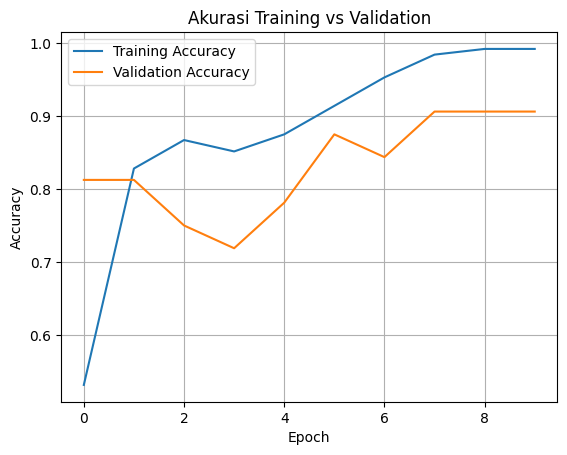

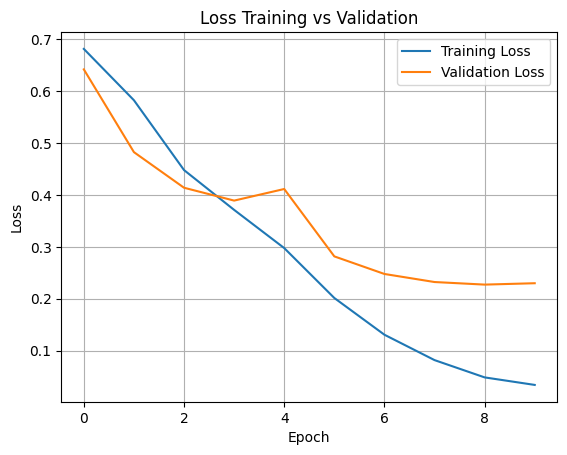

In [24]:
# Evaluasi model dengan data test
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi akurasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## 📌 Penutup dan Refleksi

### 🔍 Kesimpulan

Pada tugas ini, saya membangun model klasifikasi teks menggunakan arsitektur **Long Short-Term Memory (LSTM)** untuk memisahkan pesan **spam** dan **non-spam**. Dataset terdiri dari 200 data teks (100 spam, 100 non-spam) yang diproses dan dipelajari oleh model secara bertahap.

Hasil pelatihan menunjukkan bahwa model mampu mencapai:
- Akurasi training hingga **96.75%%**
- Akurasi validasi stabil di kisaran **90.62%**
- Loss yang menurun konsisten di kedua data training dan validasi

Ini menunjukkan bahwa model **belajar dengan baik** dan tidak mengalami overfitting yang serius.

---

### ✨ Refleksi Proses

Beberapa hal penting yang saya pelajari dalam proses ini:

- **Pra-pemrosesan teks** seperti tokenisasi dan padding sangat berpengaruh terhadap performa model RNN.
- **LSTM efektif** dalam memahami urutan kata pada teks, dibanding model klasifikasi biasa.
- Visualisasi hasil pelatihan (akurasi & loss) sangat membantu dalam mengevaluasi kondisi model (underfitting/overfitting).
- Meskipun dataset relatif kecil, dengan arsitektur yang tepat dan pelatihan hati-hati, model tetap bisa mencapai performa baik.

---

### 💡 Rencana Pengembangan Selanjutnya

Jika pengembangan model ini ingin dilanjutkan, beberapa langkah yang bisa dilakukan adalah:

- Menambah jumlah data untuk memperkaya variasi teks.
- Menguji arsitektur lain seperti **GRU** atau **Bidirectional LSTM**.
- Menambahkan **Dropout** atau **EarlyStopping** untuk mencegah overfitting.
- Melakukan eksperimen dengan **augmentasi data teks**.

---

### 🙏 Penutup

Tugas ini memberi saya pengalaman berharga dalam menerapkan arsitektur RNN pada kasus nyata klasifikasi teks. Saya juga belajar untuk tidak hanya fokus pada hasil akhir, tetapi juga pada proses eksplorasi dan evaluasi model secara menyeluruh.

